# Bryce Hill | ECEN 4562

## Lab 9: M-ary Amplitude and Frequency Shift Keying, Signal Space


### 4/11/17

In [1]:
# Import libraries
from pylab import *         # Imports numpy (as np) and matplotlib (as mpl)
import numpy as np
import scipy.integrate as integrate
# %matplotlib notebook 
%matplotlib inline 
                            # Adds interactive matplotlib backend
plt.rc('text', usetex=True) # Enable the use of LaTeX for plot titles/labels

# Import my libraries
import my_grc
import my_sdr as sdr
import my_jupyter
import my_ft as ft
import my_ascbin as ascbin
import my_am as am
import my_shiftKeying as sk

** <span style="color:red"> NOTE: must run *install_bryce_lib.sh* file to install libraries onto your computer. When done simply run the *uninstall_bryce_lib.sh* script </span>. **

In [33]:
sk.testmy_shiftKeying()
# Import plot size settings
my_jupyter.my_settings()

Plot settings imported into current workspace


## Experiment 1:  Amplitude Shift Keying. 

### ----------------------------------------------------------------------------------------------------------------
 
 - ** 1.a - Keyfun.py python module - Amplitude Shift Keying (ASK) Transmitter **

### ----------------------------------------------------------------------------------------------------------------


Binary Sequence: 
 [0 1 1 0 0 0 0 1 0 1]

Polar Binary Sequence: 
 [-1  1  1 -1 -1 -1 -1  1 -1  1]


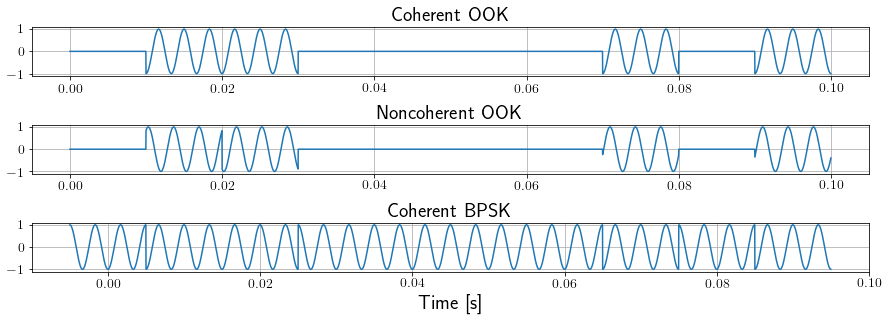

In [3]:
Fs = 44100  # Sampling Frequency
FB = 100    # Baud Rate
fc = 300    # Carrier Frequency

# Generate random binary sequence to use to test askxmtr
an = np.random.choice([0, 1], size=(10,))
sig_an = sdr.sigSequ(an, FB, 0)

# Set BPSK signal
anb = copy(an)
iz = anb < 1
anb[iz] = -1
sig_anb = sdr.sigSequ(anb, FB, 0)

xtc = sk.askxmtr(sig_an,Fs,'rect',[],'coh',[fc, 0])
xtnc = sk.askxmtr(sig_an,Fs,'rect',[],'noncoh',[fc])
xtbc = sk.askxmtr(sig_anb, Fs, 'rect', [], 'coh', [fc, 0])

f1 = figure()
p1 = f1.add_subplot(311)
p1.plot(arange(0,len(xtc.sig))/Fs, xtc.sig), grid()
p1.set_title('Coherent OOK')

p2 = f1.add_subplot(312)
p2.plot(arange(0,len(xtnc.sig))/Fs, xtnc.sig), grid()
p2.set_title('Noncoherent OOK')

p3 = f1.add_subplot(313)
p3.plot(xtbc.timeAxis(), xtbc.sig), grid()
p3.set_title('Coherent BPSK')
p3.set_xlabel('Time [s]')

f1.subplots_adjust(hspace=1)

print('\n\rBinary Sequence: \r\n', an)
print('\n\rPolar Binary Sequence: \r\n', anb)

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.b - Amplitude Shift Keying (ASK) Reciever **

### --------------------------------------------------------------------------------------------------------------

In [4]:
[bnc, btc, wtc, ixc] = sk.askrcvr(xtc, 'coh', [fc, 0], [FB, 0], 'rect', [])
[bnnc, btnc, wtnc, ixnc] = sk.askrcvr(xtnc, 'noncoh', [fc], [FB, 0], 'rect', [])
[bnbc, btbc, wtbc, ixbc] = sk.askrcvr(xtbc, 'coh', [fc, 0], [FB, 0], 'rect', [])
# Check results
sk.askrcvr_plot(bnc, ['bn', 'Coherent OOK ASK'], 0)
sk.askrcvr_plot(bnnc, ['bn', 'Noncoherent OOK ASK'], 0)
sk.askrcvr_plot(bnbc, ['bn', 'Coherent BPSK ASK'], 0)

Received Coherent OOK ASK: Binary Sequence
  [ 0.  1.  1.  0.  0.  0.  0.  1.  0.  1.]
Received Noncoherent OOK ASK: Binary Sequence
  [ 0.  1.  1.  0.  0.  0.  0.  1.  0.  1.]
Received Coherent BPSK ASK: Binary Sequence
  [-1.  1.  1. -1. -1. -1. -1.  1. -1.  1.]


All three receiver configurations accurately receive the signal

In [35]:
# sk.askrcvr_plot(btc, ['bt', 'Coherent OOK ASK Time Series', 0])
# sk.askrcvr_plot(btnc, ['bt', 'Nonoherent OOK ASK Time Series', 0])
# sk.askrcvr_plot(btbc, ['bt', 'Coherent BPSK ASK Time Series', 0])

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.c - Power Spectral Density and Phase Comparison  **

### --------------------------------------------------------------------------------------------------------------

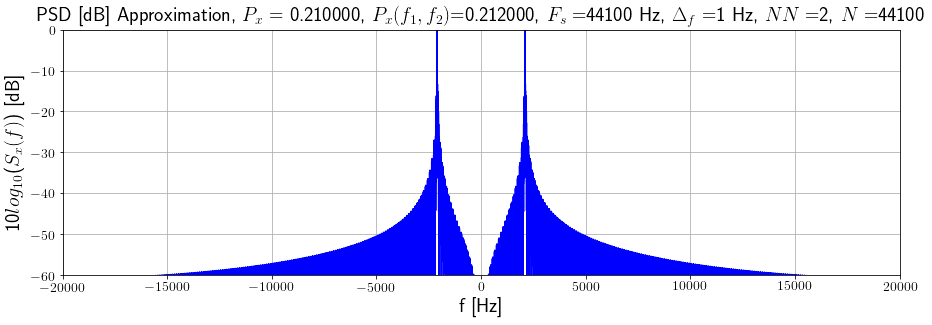

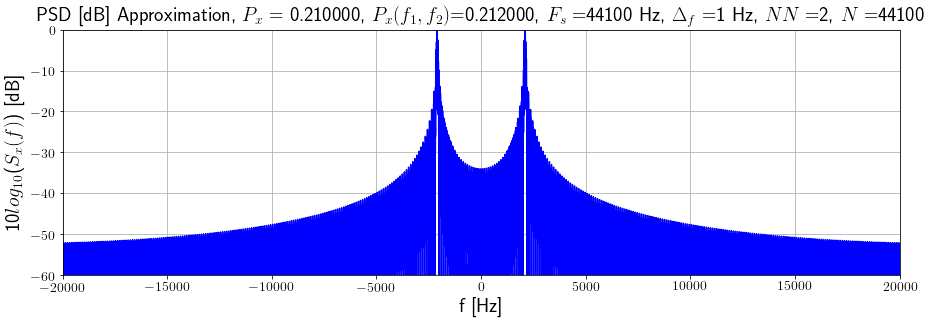

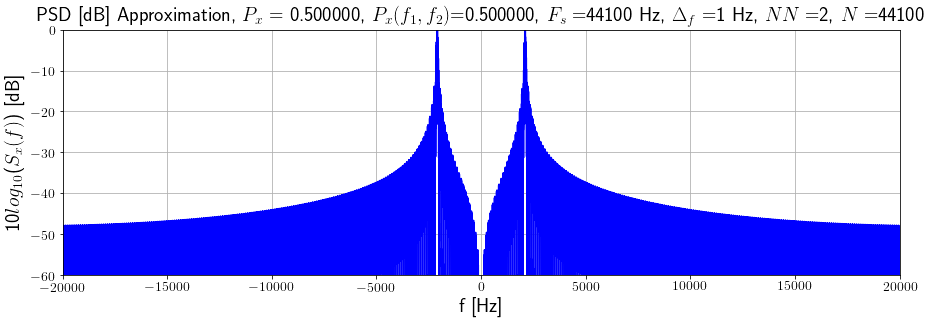

In [6]:
Fs = 44100   # Sampling frequency
FB = 100     # BAUD
fc = 2100    # Carrier frequency
time = 2     # Seconds
tlen = FB*time # Total number of symbols

# Generate random binary sequence to use to test askxmtr
an = np.random.choice([0, 1], size=(tlen,))
sig_an = sdr.sigSequ(an, FB, 0)

# Set BPSK signal
anb = copy(an)
iz = anb < 1
anb[iz] = -1
sig_anb = sdr.sigSequ(anb, FB, 0)

# Transmit the signal via ASK
xtc = sk.askxmtr(sig_an,Fs,'rect',[],'coh',[fc, 0])
xtnc = sk.askxmtr(sig_an,Fs,'rect',[],'noncoh',[fc])
xtbc = sk.askxmtr(sig_anb, Fs, 'rect', [], 'coh', [fc, 0])

# Power Spectral Density
ft.showpsd0(xtc, [-20000, 20000, -60], Fs)
ft.showpsd0(xtnc, [-20000, 20000, -60], Fs)
ft.showpsd0(xtbc, [-20000, 20000, -60], Fs)

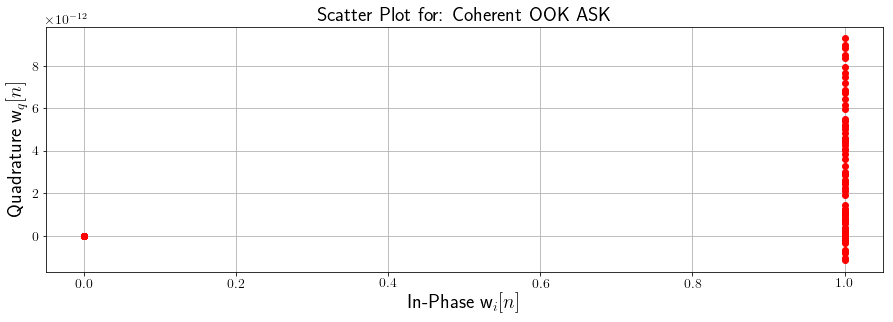

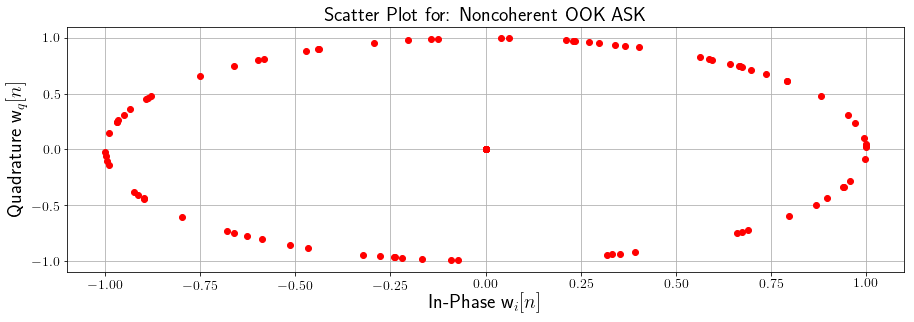

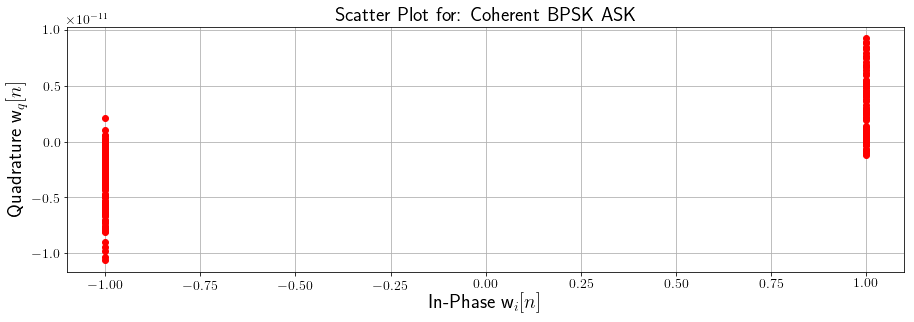

In [7]:
# Demodulate the signals
[bnc, btc, wtc, ixc] = sk.askrcvr(xtc, 'coh', [fc, 0], [FB, 0], 'rect', [])
[bnnc, btnc, wtnc, ixnc] = sk.askrcvr(xtnc, 'noncoh', [fc], [FB, 0], 'rect', [])
[bnbc, btbc, wtbc, ixbc] = sk.askrcvr(xtbc, 'coh', [fc, 0], [FB, 0], 'rect', [])

# Next, create scatter plots
sk.askrcvr_plot(wtc, ['wn', 'Coherent OOK ASK', 0], ixc)
sk.askrcvr_plot(wtnc, ['wn', 'Noncoherent OOK ASK', 0], ixnc)
sk.askrcvr_plot(wtbc, ['wn', 'Coherent BPSK ASK', 0], ixbc)

# sk.askrcvr_plot(wtc, ['wt', 'Coherent OOK ASK', 0], 0)
# sk.askrcvr_plot(wtnc, ['wt', 'Noncoherent OOK ASK', 0], 0)
# sk.askrcvr_plot(wtbc, ['wt', 'Coherent BPSK ASK', 0], 0)

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.d - Process .wav ASK Signals **

### --------------------------------------------------------------------------------------------------------------

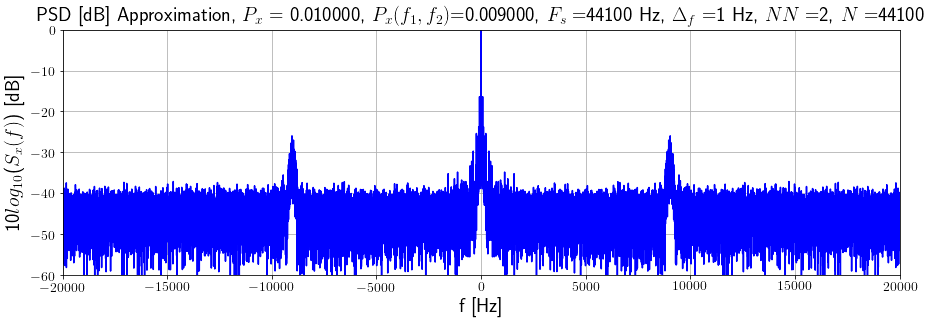

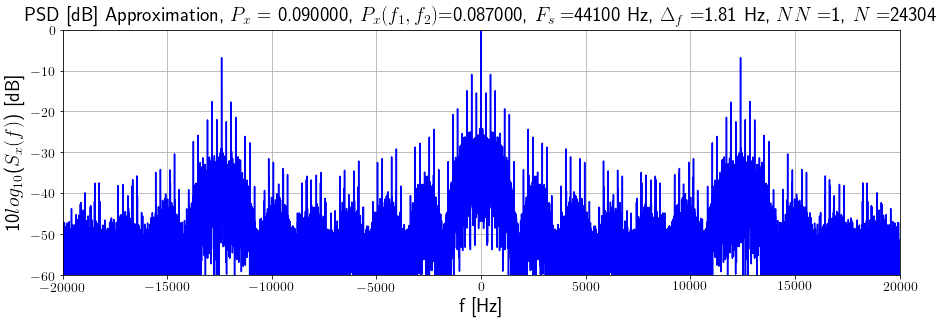

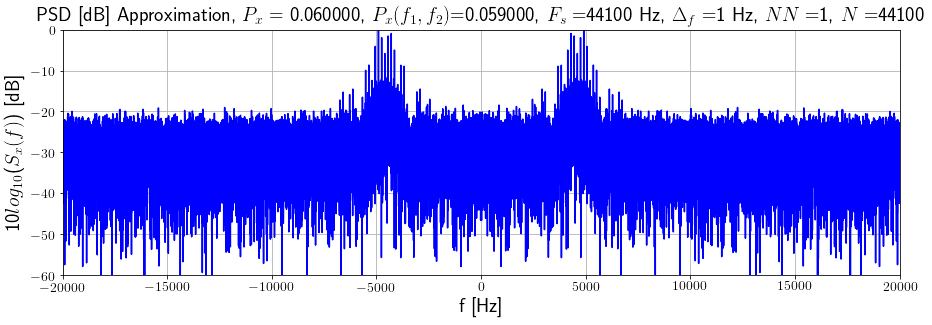

In [8]:
[w901, Fs1] = sdr.wavread('asksig901.wav')
[w902, Fs2] = sdr.wavread('asksig902.wav')
[w903, Fs3] = sdr.wavread('asksig903.wav')

sig_901 = sdr.sigWave(w901, Fs1, 0)
sig_902 = sdr.sigWave(w902, Fs2, 0)
sig_903 = sdr.sigWave(w903, Fs3, 0)

# Step 1: Look at PSD of squared signals to determine Fs
ft.showpsd0(sdr.sigWave(square(sig_901.sig), Fs1, 0), [-20000, 20000, -60], Fs1)
ft.showpsd0(sdr.sigWave(square(sig_902.sig), Fs2, 0), [-20000, 20000, -60], Fs2)
ft.showpsd0(sdr.sigWave((sig_903.sig), Fs3, 0), [-20000, 20000, -60], Fs3)

- Sig_901 fc = 4515, possible bandwidth = 600 Hz
- Sig_902 fc = 6200, possible bandwidth = 3200 Hz
- Sig_903 fc = 4598, possible bandwidth = 2000 Hz

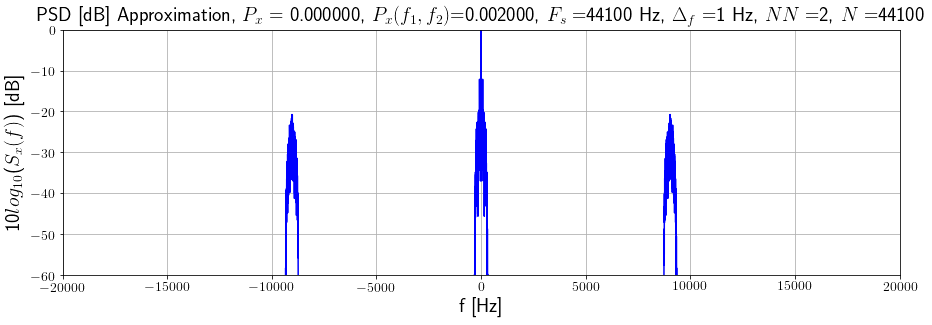

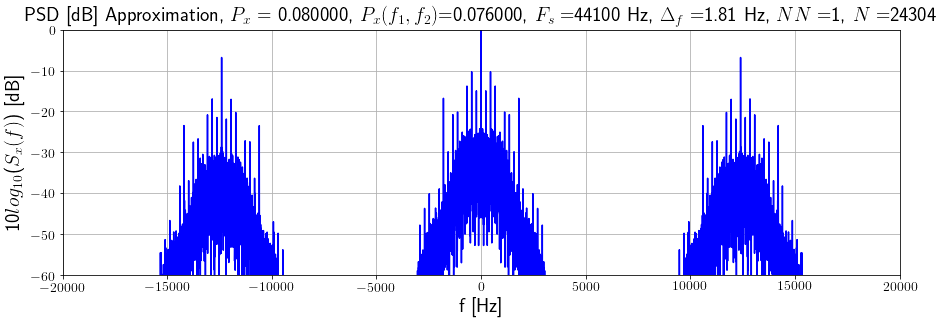

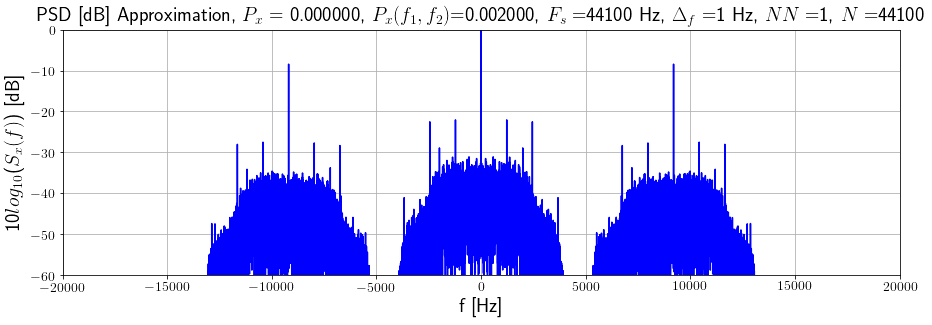

In [9]:
# Step 2: Band or lowpass signal to remove noise before determining baud rate 
# 901
[sig_901_f, order] = sdr.trapfilt(sig_901, [300, 4520], 20, .05, 0, 0)
ft.showpsd0(sdr.sigWave(np.square(sig_901_f.sig), Fs1, 0), [-20000, 20000, -60], Fs1)

# 902
[sig_902_f, order] = sdr.trapfilt(sig_902, [4000, 6200], 20, .05, 0, 0)
ft.showpsd0(sdr.sigWave(np.square(sig_902_f.sig), Fs2, 0), [-20000, 20000, -60], Fs2)

# 903
[sig_903_f, order] = sdr.trapfilt(sig_903, [4000, 4598], 20, .05, 0, 0)
ft.showpsd0(sdr.sigWave(np.square(sig_903_f.sig), Fs3, 0), [-20000, 20000, -60], Fs3)

In [10]:
# Step 3: Demodulate
# 901
FB1 = 300
dly1 = .5
thetac = 0
fc1 = 4500
[sig_901_bn, sig_901_bt, sig_901_wt, ix_901] = sk.askrcvr(sig_901_f, 'noncoh', [fc1, thetac], [FB1, dly1], 'rect', [])

# 902
FB2 = 1800 # In the second figure above, the BAUD rate info is in the baseband. There is a peak at 1800, that is how I found it
dly2 = .5
thetac = 15
fc2 = 6200
[sig_902_bn, sig_902_bt, sig_902_wt, ix_902] = sk.askrcvr(sig_902_f, 'coh', [fc2, thetac], [FB2, dly2], 'rect', [])

# 903
FB3 = 1225
dly3 = 0
thetac = 0
fc3 = 4599
sig_903 = sdr.sigWave(w903, Fs3, 1/(2.0*FB3))

[sig_903_bn, sig_903_bt, sig_903_wt, ix_903] = sk.askrcvr(sig_903, 'coh', [fc3, thetac], [FB3, dly3], 'rect', [])

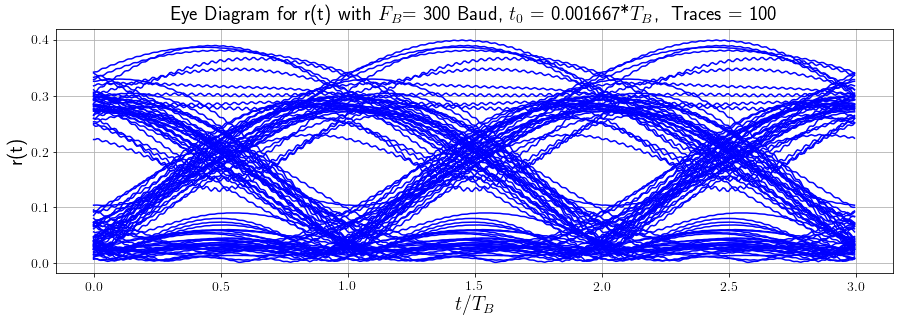

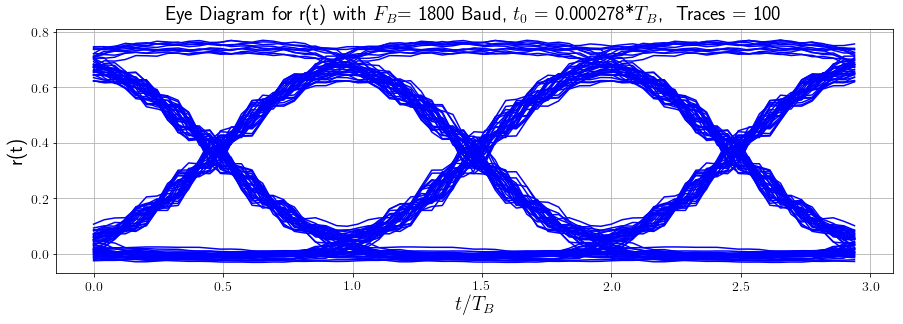

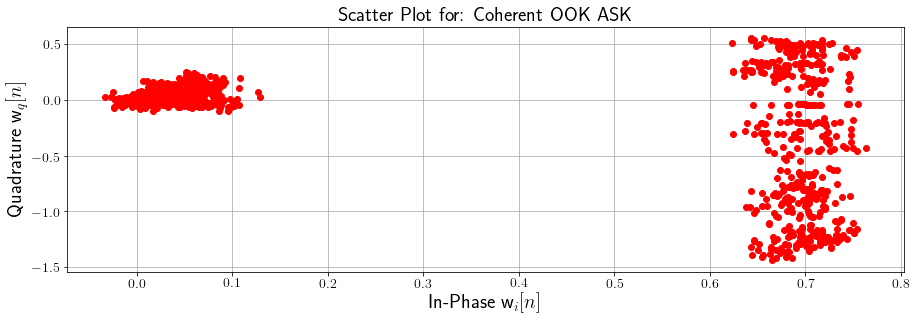

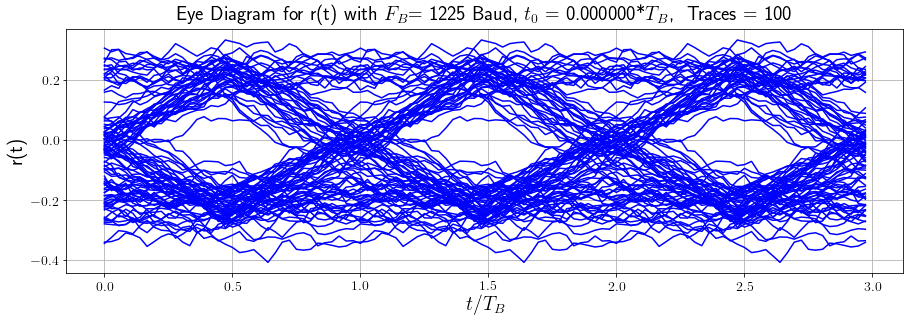

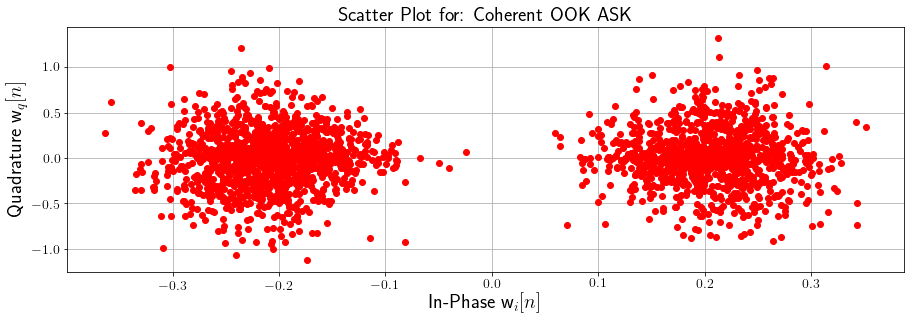

In [11]:
# Step 4: look at eye diagram
# 901
L = 1
ft.showeye(sig_901_bt, FB1, 100, dispparms=[dly1, 3, -1.5*L, 1.5*L])

# 902
L = 3
ft.showeye(sig_902_bt, FB2, 100, dispparms=[dly2, 3, -1.5*L, 1.5*L])
sk.askrcvr_plot(sig_902_wt, ['wn', 'Coherent OOK ASK', 0], ix_902)

# 903
L = 1
ft.showeye(sig_903_bt, FB3, 100, dispparms=[dly3, 3, -1.5*L, 1.5*L])
sk.askrcvr_plot(sig_903_wt, ['wn', 'Coherent OOK ASK', 0], ix_903)

In [12]:
# Step 5: Get message
# 901
sig_901_th = ascbin.binthresh_2(sig_901_bn.sig, .18)
msg901 = ascbin.bin2asc(sig_901_th)
print('Sig_901 Message: \n\r', msg901)
# print(sig_901_bn.sig[1])
# print(sig_901_bn.sig)
# print(sig_901_th)

# 902
sig_902_th = ascbin.binthresh_2(sig_902_bn.sig, .4)
msg902 = ascbin.bin2asc(sig_902_th)
print('Sig_902 Message: \n\r', msg902)
# print(sig_902_bn.sig)

# 903
sig_903_th = ascbin.binthresh_2(sig_903_bn.sig, 0)
msg903 = ascbin.bin2asc(sig_903_th)
print('Sig_903 Message: \n\r', msg903)
# print(sig_903_bn.sig)

Sig_901 Message: 
  If the Secret Service finds shredded paper in your trash, they WILL piece it back together!
Sig_902 Message: 
  The United States is number one in cosmetics spending, yet ranked number 23 on the world's "satisfaction with life" ranking.
Sig_903 Message: 
  L'adaptabilite est le secret de la survie. Selon Charles Darwin, ni le plus fort ni le plus intelligent mais seulement les especes les plus adaptables gagne a la fin. Alors faites de votre mieux pour etre le plus adaptable, dans votre vie personnelle autant que dans les relations professionnelles.


## Experiment 2:   Frequency Shift Keying. 

### ----------------------------------------------------------------------------------------------------------------
 
 - ** 2.a - Keyfun.py python module - Frequency Shift Keying (FSK) Transmitter **

### ----------------------------------------------------------------------------------------------------------------

In [13]:
# Generate the FSK transmissions
dn = asarray([0, 1, 1, 1, 0, 0, 1, 0])  # Fixed first 8 bits
FB = 100
dn_add = np.random.choice([0, 1], size=(10000), p=[1./2, 1./2])
dn = np.concatenate((dn, dn_add))

fcparms = [[300, 400], [-90, -90]]
M = 2
Fs = 44100

sig_xt_coh = sk.fskxmtr(M, sdr.sigSequ(dn, FB, 0), Fs, 'rect', [], 'coh', fcparms)
sig_xt_ncoh = sk.fskxmtr(M, sdr.sigSequ(dn, FB, 0), Fs, 'rect', [], 'noncoh', fcparms[0])
sig_xt_cpfsk = sk.fskxmtr(M, sdr.sigSequ(dn, FB, 0), Fs, 'rect', [], 'cpfsk', [300, FB])

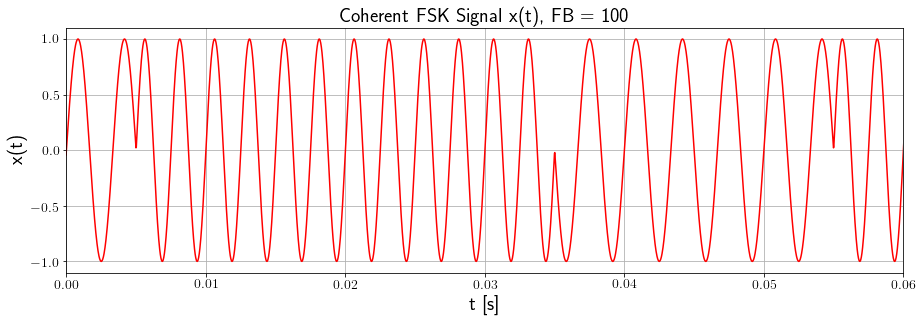

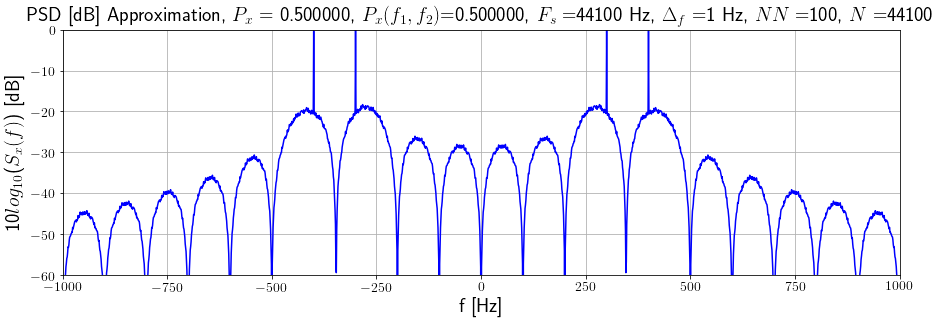

In [14]:
# Show the plots
sk.fskxmtr_plot(M, sig_xt_coh, FB, 'coh', ['tx', .06])
sk.fskxmtr_plot(M, sig_xt_coh, FB, 'coh', ['psd', 1000])

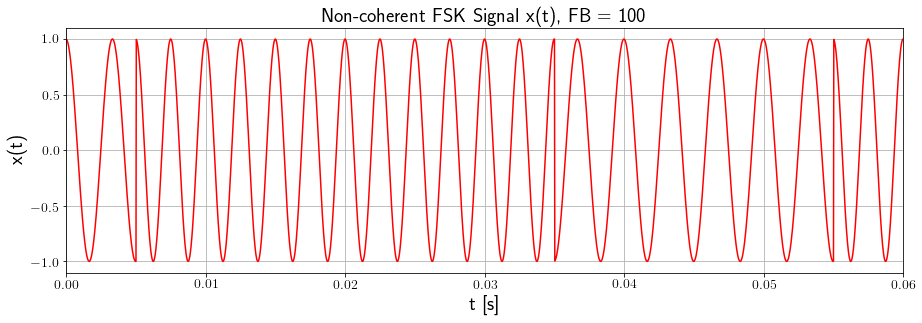

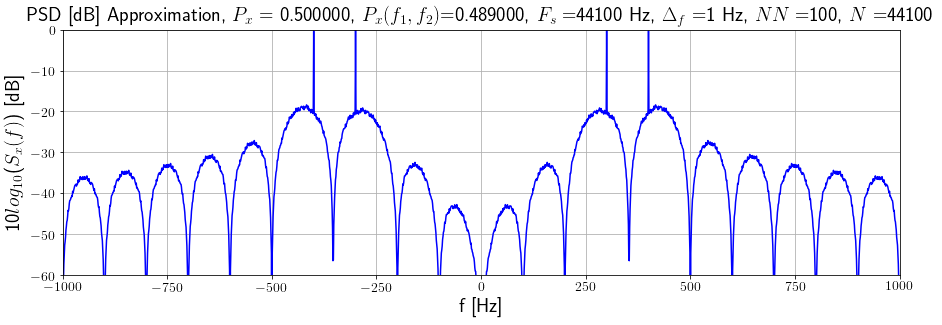

In [15]:
# Show the plots
sk.fskxmtr_plot(M, sig_xt_ncoh, FB, 'noncoh', ['tx', .06])
sk.fskxmtr_plot(M, sig_xt_ncoh, FB, 'noncoh', ['psd', 1000])

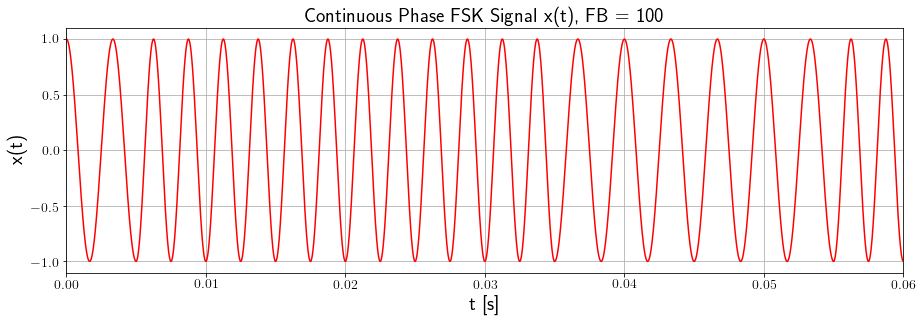

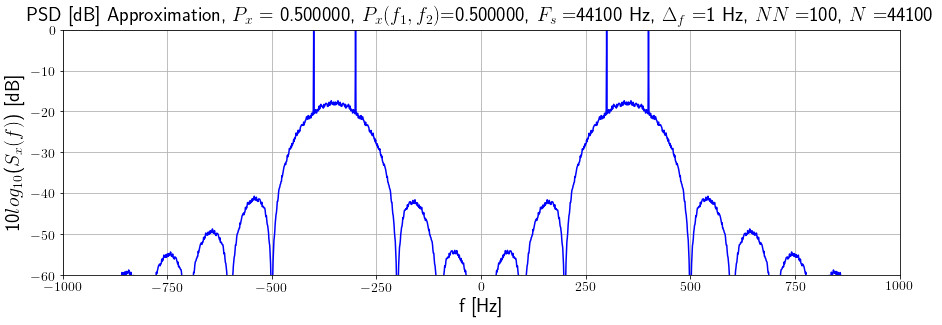

In [16]:
# Show the plots
sk.fskxmtr_plot(M, sig_xt_cpfsk, FB, 'cpfsk', ['tx', 0.06])
sk.fskxmtr_plot(M, sig_xt_cpfsk, FB, 'cpfsk', ['psd', 1000])

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.b - FSK Receiver **

### --------------------------------------------------------------------------------------------------------------

In [17]:
dly = 0
FBparms = [FB, dly]

# Demodulate only the first 8 bits 
sig_xt_coh_short = sdr.sigWave(sig_xt_coh.sig[0:8*int(Fs/FB)], Fs, sig_xt_coh.get_t0())
sig_xt_ncoh_short = sdr.sigWave(sig_xt_ncoh.sig[0:8*int(Fs/FB)], Fs, sig_xt_ncoh.get_t0())

[sig_bn_coh, sig_wt_coh, ixc] = sk.fskrcvr(M, sig_xt_coh_short, 'coh', fcparms, FBparms, 'rect', [])
[sig_bn_ncoh, sig_wt_ncoh, ixnc] = sk.fskrcvr(M, sig_xt_ncoh_short, 'noncoh', fcparms[0], FBparms, 'rect', [])
# [sig_nt_cpfsk, sig_wt_cpfsk, ixcp] = sk.fskrcvr(M, sig_xt_cpfsk, 'cpfsk', [300, FB], FBparms, 'rect')

In [18]:
sk.fskrcvr_plot(M, sig_bn_coh, ['bn', 'Coherent OOK FSK'], 0)
sk.fskrcvr_plot(M, sig_bn_ncoh, ['bn', 'Noncoherent OOK FSK'], 0)

Received Coherent OOK FSK: Binary Sequence
  [0 1 1 1 0 0 1 0]
Received Noncoherent OOK FSK: Binary Sequence
  [0 1 1 1 0 0 1 0]


In [19]:
print(sig_wt_ncoh.signal()[1,:].shape)

(3528,)


### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.c - FSK Coherent Phase Effects Investigation **

### --------------------------------------------------------------------------------------------------------------

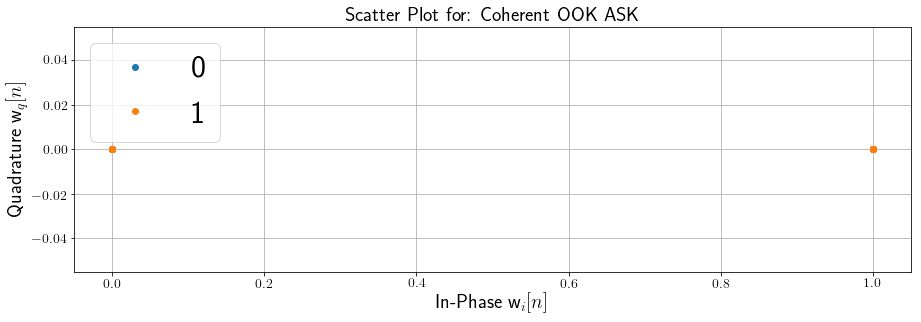

In [20]:
sig2b_xt_coh = sk.fskxmtr(M, sdr.sigSequ(dn, 100, 0), 44100, 'rect', [], 'coh', [[300, 400], [0, 0]])
[sig2b_bn_coh, sig2b_wt_coh, ixc_2b] = sk.fskrcvr(M, sig2b_xt_coh, 'coh', [[300, 400], [0, 0]], FBparms, 'rect', [])
sk.fskrcvr_plot(M, sig2b_wt_coh, ['wn', 'Coherent OOK ASK', 0], ixc_2b)

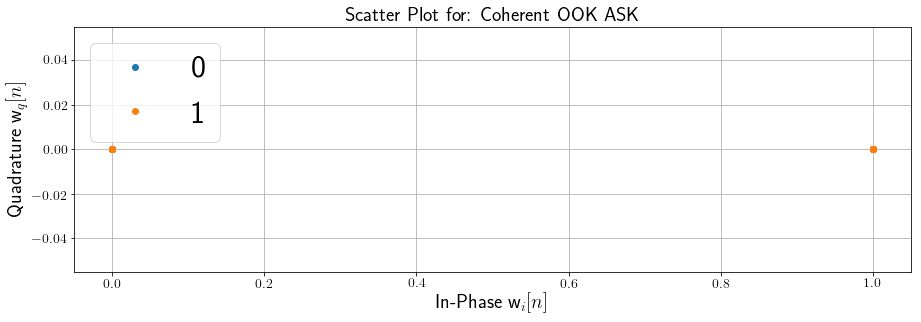

In [21]:
sig2b_xt_coh2 = sk.fskxmtr(M, sdr.sigSequ(dn, 100, 0), 44100, 'rect', [], 'coh', [[300, 350], [0, 90]])
[sig2b_bn_coh2, sig2b_wt_coh2, ixc_2b2] = sk.fskrcvr(M, sig2b_xt_coh2, 'coh', [[300, 350], [0, 90]], FBparms, 'rect', [])
sk.fskrcvr_plot(M, sig2b_wt_coh2, ['wn', 'Coherent OOK ASK', 0], ixc_2b2)

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.d - More Stuff... **

### --------------------------------------------------------------------------------------------------------------

In [22]:
M4 = 4
FBparms4 = [100, 0]
fcparms4 = [[2100, 2200, 2300, 2400],[0, 0, 0, 0]]
dn4 = np.random.choice([0, 1, 2, 3], size=(FB*2), p=[1./4, 1./4, 1./4, 1./4])

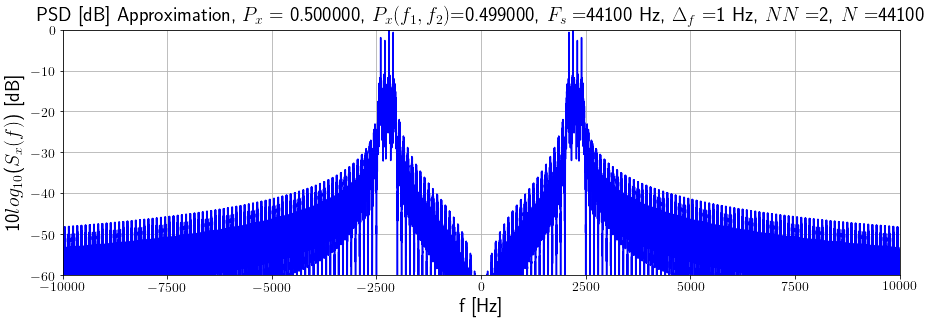

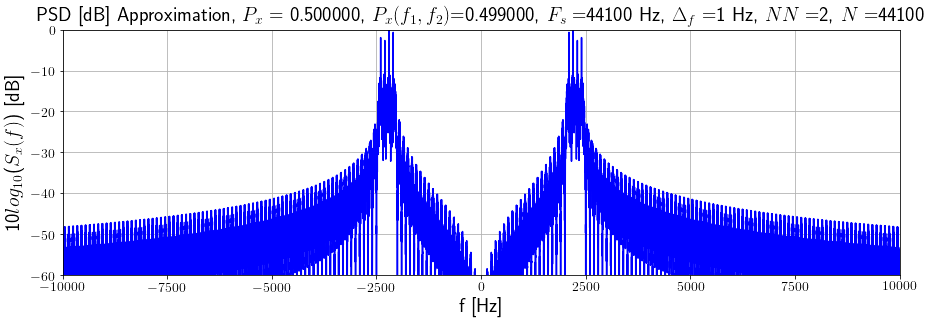

In [23]:
# Coherent 4-ary
sig4_xt_coh = sk.fskxmtr(M4, sdr.sigSequ(dn4, FBparms4[0], 0), 44100, 'rect', [], 'coh', fcparms4)
sk.fskxmtr_plot(M4, sig4_xt_coh, FBparms4[0], 'coh', ['psd', 10000])

# Non-coherent 4-ary
sig4_xt_ncoh = sk.fskxmtr(M4, sdr.sigSequ(dn4, FBparms4[0], 0), 44100, 'rect', [], 'noncoh', fcparms4[0])
sk.fskxmtr_plot(M4, sig4_xt_ncoh, FBparms4[0], 'noncoh', ['psd', 10000])

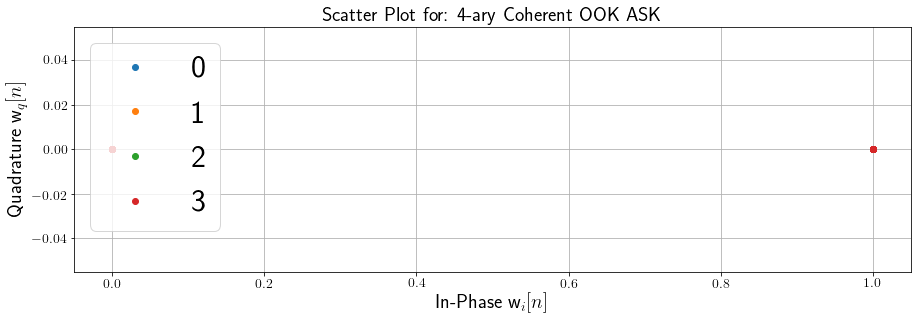

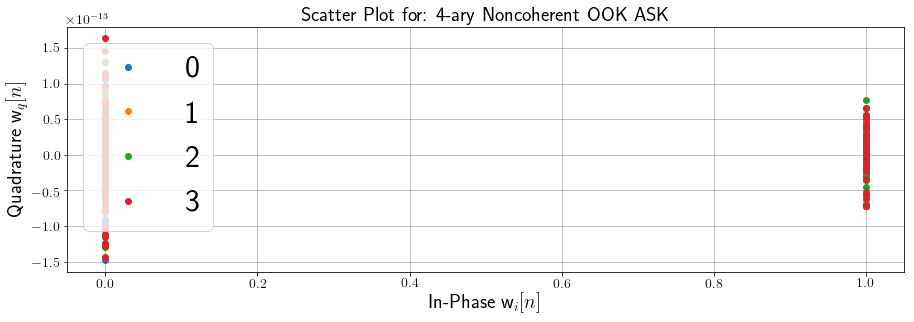

In [24]:
# Coherent 4-ary
[sig4_bn_coh, sig4_wt_coh, ixc_4] = sk.fskrcvr(M4, sig4_xt_coh, 'coh', fcparms4, FBparms4, 'rect', [])
sk.fskrcvr_plot(M4, sig4_wt_coh, ['wn', '4-ary Coherent OOK ASK', 0], ixc_4)

# Non-coherent 4-ary
[sig4_bn_ncoh, sig4_wt_ncoh, ixnc_4] = sk.fskrcvr(M4, sig4_xt_coh, 'noncoh', fcparms4[0], FBparms4, 'rect', [])
sk.fskrcvr_plot(M4, sig4_wt_ncoh, ['wn', '4-ary Noncoherent OOK ASK', 0], ixnc_4)

In [25]:
M2 = 2
FBparms2 = [100, 0]
fcparms2 = [[2100, 2200],[0, 0]]
dn2 = np.random.choice([0, 1], size=(FBparms2[0]*2), p=[1./2, 1./2])

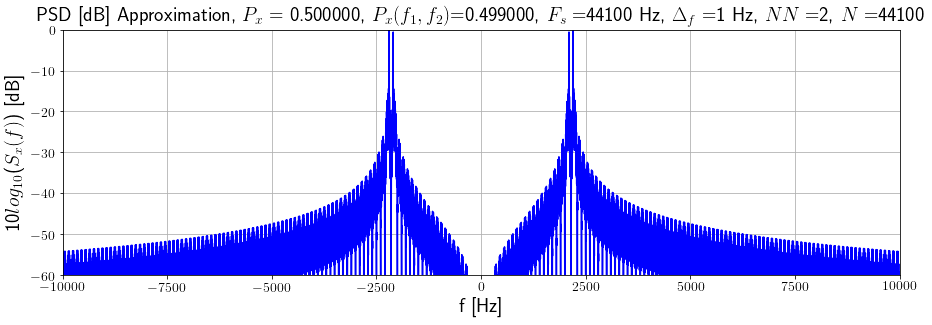

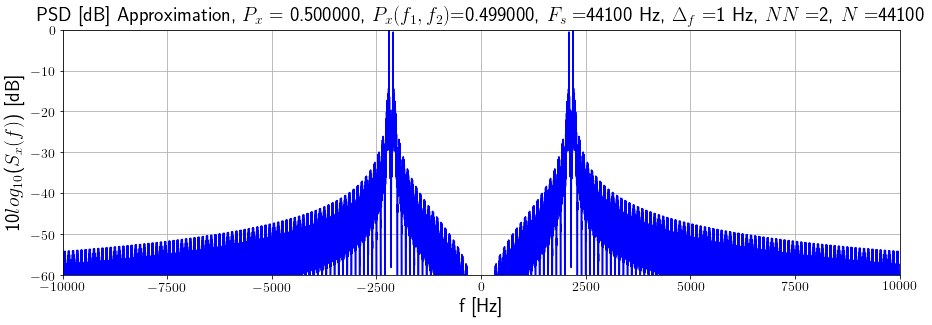

In [26]:
# Coherent 2-ary
sig2_xt_coh = sk.fskxmtr(M2, sdr.sigSequ(dn2, FBparms2[0], 0), 44100, 'rect', [], 'coh', fcparms2)
sk.fskxmtr_plot(M2, sig2_xt_coh, FBparms2[0], 'coh', ['psd', 10000])

# Non-coherent 2-ary
sig2_xt_ncoh = sk.fskxmtr(M2, sdr.sigSequ(dn2, FBparms2[0], 0), 44100, 'rect', [], 'noncoh', fcparms2[0])
sk.fskxmtr_plot(M2, sig2_xt_ncoh, FBparms2[0], 'noncoh', ['psd', 10000])

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.e - Demodulate fsksig901 and 902 .wav file **

### --------------------------------------------------------------------------------------------------------------

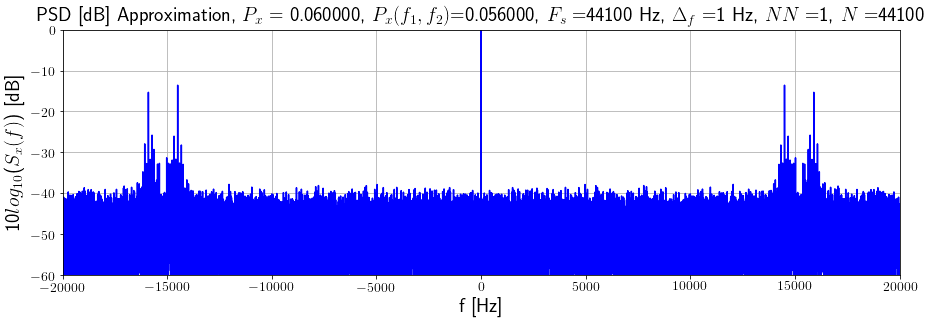

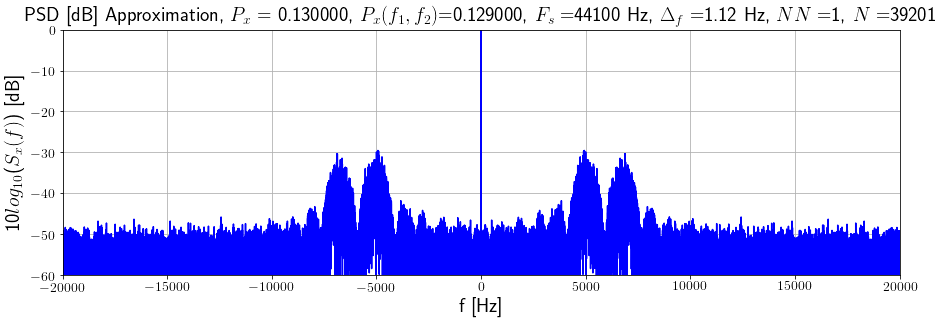

In [27]:
[fsk901, Fs1] = sdr.wavread('fsksig901.wav')
[fsk902, Fs2] = sdr.wavread('fsksig902.wav')

fsksig_901 = sdr.sigWave(fsk901, Fs1, 0)
fsksig_902 = sdr.sigWave(fsk902, Fs2, 0)

# Step 1: Look at PSD of squared signals to determine Fs
ft.showpsd0(sdr.sigWave(square(fsksig_901.sig), Fs1, 0), [-20000, 20000, -60], Fs1)
ft.showpsd0(sdr.sigWave(square(fsksig_902.sig), Fs2, 0), [-20000, 20000, -60], Fs2)

902, noncoherent because there are not distinct peaks at fc

- FSKsig_901 fc = 14500/2, 15943/2 | possible bandwidth = 1400 Hz | BAUD = 700
- FSKsig_902 fc = (7560-5970)/2, (5860-4180)/2 | possible bandwidth = 1500 Hz | BAUD = 872.5

In [28]:
print('fc1: ', 14500/2, ' ', 15900/2, ' | BAUD = ', (15900-14500)/2)
print('fc2: ', (7560-5970)/2+5970, ' ', (5860-4180)/2+4180, ' | BAUD = ', (6765-5020)/2)

fc1:  7250.0   7950.0  | BAUD =  700.0
fc2:  6765.0   5020.0  | BAUD =  872.5


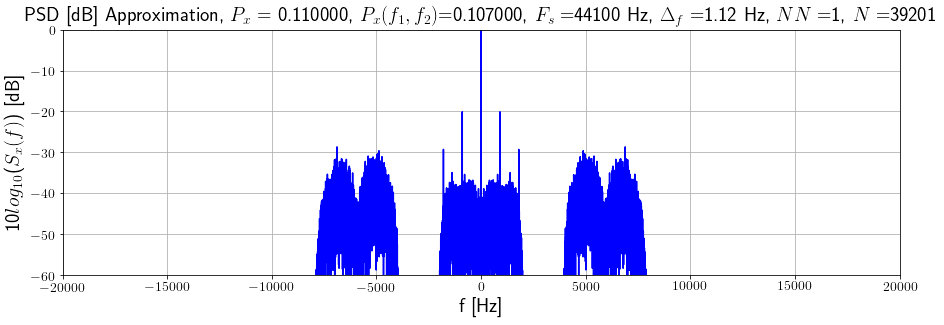

In [29]:
# Filter to find BAUD rate at baseband

# Step 2: Band or lowpass signal to remove noise before determining baud rate 
# 901
# [fsksig_901_f, order] = sdr.trapfilt(fsksig_901, [300, 4520], 20, .05, 0, 0)
# ft.showpsd0(sdr.sigWave(np.square(fsksig_901_f.sig), Fs1, 0), [-20000, 20000, -60], Fs1)

# 902
[fsksig_902_f, order] = sdr.trapfilt(fsksig_902, [2000, 5925/2], 20, .05, 0, 0)
ft.showpsd0(sdr.sigWave(np.square(fsksig_902_f.sig), Fs2, 0), [-20000, 20000, -60], Fs2)

In [30]:
# Step 3: Demodulate
# 901
M1 = 2
FBparms1 = [700, 0]
fcparms1 = [[7250, 7950],[0, 0]]
fsksig_901.set_t0(-1/(2*FBparms1[0]))
[fsksig_901_bn, fsksig_901_wt, fskix_901] = sk.fskrcvr(M1, fsksig_901, 'noncoh', fcparms1[0], FBparms1, 'rect', [])

# 902
M1 = 2
FBparms2 = [900, 0]
fcparms2 = [[4950/2, 6897/2],[0, 0]]
fsksig_902.set_t0(-1/(2*FBparms2[0]))
[fsksig_902_bn, fsksig_902_wt, fskix_902] = sk.fskrcvr(M2, fsksig_902, 'noncoh', fcparms2[0], FBparms2, 'rect', [])

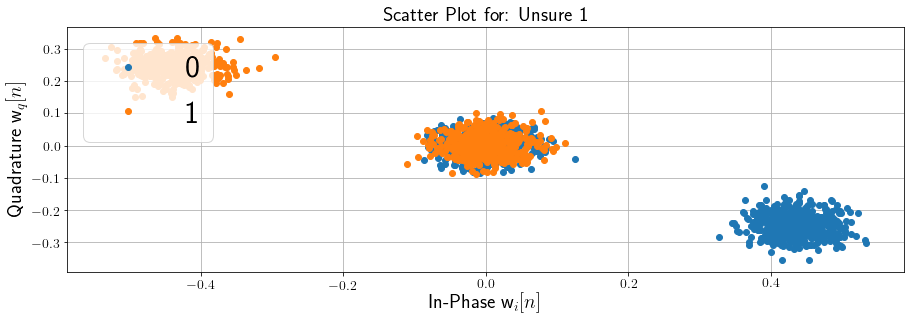

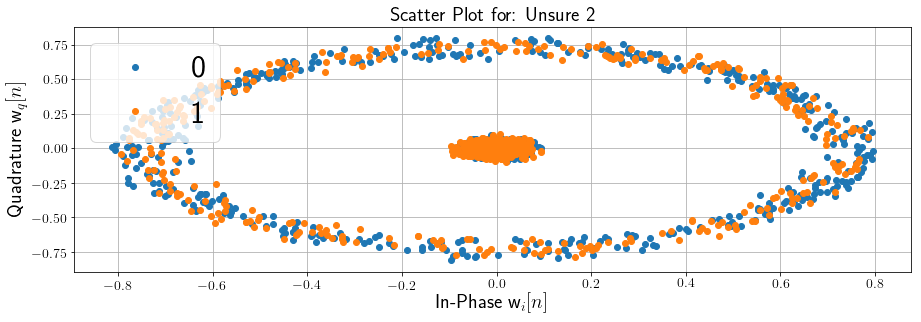

In [31]:
# Step 4: look at eye diagram
# 901
L = 1
# ft.showeye(sig_901_bt, FB1, 100, dispparms=[dly1, 3, -1.5*L, 1.5*L])
sk.fskrcvr_plot(2, fsksig_901_wt, ['wn', 'Unsure 1', 0], fskix_901)

# 902
L = 3
# ft.showeye(sig_902_bt, FB2, 100, dispparms=[dly2, 3, -1.5*L, 1.5*L])
sk.fskrcvr_plot(2, fsksig_902_wt, ['wn', 'Unsure 2', 0], fskix_902)

In [32]:
# Step 5: Get message
# 901
fsksig_901_th = ascbin.binthresh_2(fsksig_901_bn.sig, .2)
fskmsg901 = ascbin.bin2asc(fsksig_901_th)
print('fskSig_901 Message: \n\r', fskmsg901)

# 902
fsksig_902_th = ascbin.binthresh_2(fsksig_902_bn.sig, .2)
fskmsg902 = ascbin.bin2asc(fsksig_902_th)
print('fskSig_902 Message: \n\r', fskmsg902)

fskSig_901 Message: 
  The first practical pair of roller skates was built by a Belgian musical instrument maker, Joseph Merlin, in 1759.
fskSig_902 Message: 
  The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.


### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.f - digMod_905.bin Demodulation in GNU-Radio **

### --------------------------------------------------------------------------------------------------------------

The first thing of note is the the fourier transform of the signal. From this we can identify what seem to be 3 distinct signals. At approximately:
- 76 kHz
- 152 kHz
- 236 kHz

![title](img/e2_f_fft.png)

----- SIGNAL 1 -----

By investigating the first signal around 76 kHz a solid scatter plot of in-phase vs. quadrature can be found using the parameters shown below:

![title](img/e2_f_sig1_1.png)

An envelope detector is then used to receive the message shown below:

![title](img/e2_f_sig1_2.png)

----- SIGNAL 2 -----

The second signal has a slightly unstable carrier frequency and so, for continuous reception a phase lock loop would be necessary. However, the carrier does not drift too fast for the signal to be viewed. The following parameters in GNU-Radio allow for a distinct coherent polar scatter plot:

![title](img/e2_f_sig2_0.png)

In the current configuration the signal can be seen on both the I and Q data sinks as shown below:

![title](img/e2_f_sig2_1.png)

----- SIGNAL 3 -----

Signal three can be demodulated again using the envelope detector as with the first signal. 

![title](img/e2_f_sig3_0.png)

And the demodulated signal is: 

![title](img/e2_f_sig3_1.png)